<a href="https://colab.research.google.com/github/joao-pbc/Academic/blob/main/C%C3%B3pia_de_YOLO_parafuso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de modelo com Ultralytics YOLO

O treinamento do modelo envolve ajustar seus parâmetros para que ele possa fazer previsões precisas. Modelos YOLO pré-treinados sabem detectar classes genéricas. Para detecção de objetos específicos, é preciso especializar o modelo com exemplos rotulados do domínio.

O **fine-tuning** reaproveita os pesos aprendidos e adapta rapidamente para suas classes, exigindo menos dados e menos tempo que treinar do zero.

# Estrutura do diretório para treinamento

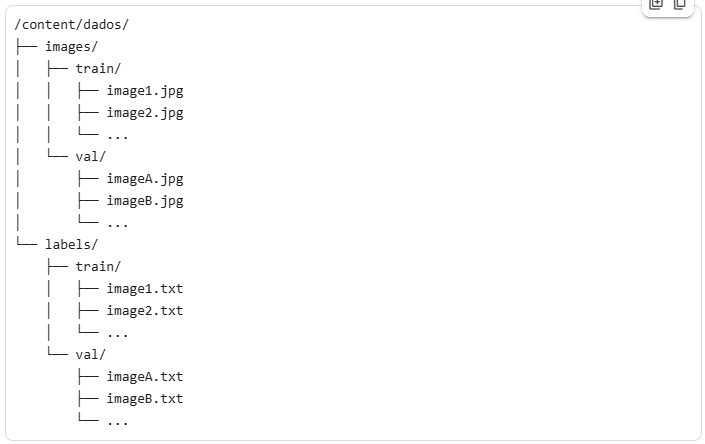

# Como rotular as imagens para treinamento no fine-tuning?
# [Make Sense](https://www.makesense.ai/)

In [ ]:
!pip install ultralytics --quiet

In [ ]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import cv2
import yaml
import os

In [ ]:
# Dados do treinamento (estrutura YOLO)
data = {
    'path': '/content/dados/', # diretório raiz do dataset
    'train': 'images/train', # subpasta de treino
    'val':   'images/train', # subpasta de validação (placeholder; usa o mesmo do train)
    'names': ['Parafuso'] # classes (id=0,1,2,...)
}

# Caminho do YAML a ser salvo
data_yaml_path = '/content/dados/data.yaml'

# Salva o dicionário acima em formato YAML
with open(data_yaml_path, 'w') as f:
    yaml.dump(data, f)

# Fine-tuning do modelo
modelo = YOLO("yolo11l-seg.pt")  # n/s/m/l/x

resultado_treino = modelo.train(
    data=data_yaml_path, # caminho do arquivo de dados YAML
    epochs=20, # mais épocas p/ adaptar (aumente/ reduza conforme over/underfitting)
    patience=10, # early stopping se não houver melhora
    imgsz=1280, # maior ajuda em objetos pequenos (custo maior)
    batch=4, # ajuste conforme VRAM
    lr0=0.003, # taxa de aprendizado inicial
    close_mosaic=10, # desliga mosaic nos últimos 10 epochs (estabiliza a convergência)
    device=0, # GPU (remova se não houver)
    name='Parafuso', # nome da execução (diretório de saída)
    project='/content/resultado', # diretório-base de saída
    val=False, # executa validação
    plots=False # plotagem do resultado de treino (usar quando existe validação)
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dados/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Parafuso3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=False, pose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Predição basead no melhor modelo gerado (best.pt)
modelo = YOLO('/content/resultado/Parafuso/weights/best.pt')
resultados = modelo.predict(
    source='/content/dados/images/train',
    imgsz=1280,
    conf=0.7,
    iou=0.3,
    save=True,
    save_crop=True,
    project='/content/resultado'
)


image 1/11 /content/dados/images/train/10-264h.jpg: 256x1280 12 Parafusos, 34.9ms
image 2/11 /content/dados/images/train/9-1008h_e.jpg: 256x1280 13 Parafusos, 33.3ms
image 3/11 /content/dados/images/train/9-264h.jpg: 256x1280 13 Parafusos, 42.2ms
image 4/11 /content/dados/images/train/9-2784h.jpg: 288x1280 12 Parafusos, 43.2ms
image 5/11 /content/dados/images/train/9-768h.jpg: 288x1280 14 Parafusos, 62.2ms
image 6/11 /content/dados/images/train/IMG_20250801_093510.jpg: 960x1280 1 Parafuso, 110.3ms
image 7/11 /content/dados/images/train/IMG_20250801_093515.jpg: 960x1280 2 Parafusos, 108.6ms
image 8/11 /content/dados/images/train/IMG_20250801_093520.jpg: 960x1280 1 Parafuso, 109.4ms
image 9/11 /content/dados/images/train/IMG_20250801_093543.jpg: 960x1280 8 Parafusos, 106.2ms
image 10/11 /content/dados/images/train/IMG_20250801_093552.jpg: 960x1280 5 Parafusos, 121.5ms
image 11/11 /content/dados/images/train/IMG_20250801_093600.jpg: 960x1280 10 Parafusos, 113.3ms
Speed: 15.1ms preprocess

In [ ]:
print (resultados)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Parafuso'}
obb: None
orig_img: array([[[ 30,  70, 119],
        [ 31,  71, 120],
        [ 31,  71, 120],
        ...,
        [255, 255, 252],
        [255, 255, 254],
        [255, 255, 254]],

       [[ 31,  71, 120],
        [ 31,  71, 120],
        [ 30,  70, 119],
        ...,
        [255, 255, 252],
        [255, 255, 254],
        [255, 255, 254]],

       [[ 31,  68, 118],
        [ 30,  67, 117],
        [ 29,  66, 116],
        ...,
        [255, 254, 250],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[ 24,  61, 123],
        [ 24,  61, 123],
        [ 24,  61, 123],
        ...,
        [254, 253, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 24,  61, 123],
        [ 24,  61, 123],
        [ 24,  61, 123],
        ...,
        [253, 252, 254],
